In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from AVN import *
from scipy.stats import norm
import scipy.io as scp
import os

## Load data:

In [2]:
with open('v0_d03_n50_every1_clusters/X95_Y95_inter.npy', 'rb') as f:
    X95 = np.load(f) ##count begin at 1 and not 0
    Y95 = np.load(f) ##count begin at 1 and not 0
    inter = np.load(f) ##count begin at 1 and not 0
    
#print(X95,Y95,inter) ##ok!

In [3]:
dfI = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/df_integral.csv")

dfI.head()

,IX,IY
0,0.999992,0.994197
1,0.997384,0.758680
2,0.789291,0.646592
3,0.981163,0.968004
4,0.933878,0.993515


In [4]:
dfM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfM.csv")
dfM['N'] = dfM['N'].astype(int)

dfM.index = dfM.I.values ##count begin at 1 and not 0

#dfM = dfM.drop(['I'], axis=1)

dfM.head()

,N,max_m,V2,plana,I,duration,v,swarms
1,180,1.7358,0.0403,0.0669,1,3.4026,0.099104,1
2,86,1.9626,0.0152,0.3706,2,2.0668,0.094615,2
4,69,0.7173,0.0093,0.4461,4,1.9180,0.027480,4
5,90,1.5348,0.0229,0.4009,5,4.0596,0.033489,5
6,166,1.5023,0.0244,0.3296,6,3.1943,0.072894,6


In [5]:
dfNM = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dfNM.csv")
dfNM['N'] = dfNM['N'].astype(int)

dfNM.index = dfNM.I.values ##count begin at 1 and not 0

#dfNM = dfNM.drop(['I'], axis=1)

dfNM.head()

,N,max_m,V2,plana,I,duration,v,swarms
3,66,1.3078,0.0246,0.4368,3,2.1842,0.099104,3
7,53,1.2729,0.1146,0.5108,7,0.2259,0.094615,7
15,72,1.3143,0.0157,0.3954,15,4.7798,0.115760,15
22,76,1.8884,0.0258,0.3519,22,5.3327,0.033489,22
23,106,1.1799,0.0364,0.7107,23,0.1622,0.072894,23


In [6]:
dfA = pd.read_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/quick_stats_all_swarms.csv")
dfA['N'] = dfA['N'].astype(int)

dfA.index = dfA.I.values ##count begin at 1 and not 0

#dfA = dfA.drop(['I'], axis=1)
##Renew dataframe A:
#dfA.to_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/quick_stats_all_swarms.csv")
##run only once

dfA#.head()

,N,max_m,V2,plana,I,duration,v
1,180,1.7358,0.0403,0.0669,1,3.4026,0.037352
2,86,1.9626,0.0152,0.3706,2,2.0668,0.097782
3,66,1.3078,0.0246,0.4368,3,2.1842,0.112986
4,69,0.7173,0.0093,0.4461,4,1.9180,0.036495
5,90,1.5348,0.0229,0.4009,5,4.0596,0.060144
6,166,1.5023,0.0244,0.3296,6,3.1943,0.045565
7,53,1.2729,0.1146,0.5108,7,0.2259,0.015355
8,161,2.1737,0.0259,0.6164,8,3.6663,0.027984
9,110,1.1609,0.0156,0.1055,9,4.4534,0.104192
10,523,2.4513,0.1044,0.6143,10,1.4172,0.017085


In [7]:
dfA.describe()

,N,max_m,V2,plana,I,duration,v
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,229.450000,1.686992,0.084393,0.423178,20.500000,3.241615,0.125315
std,359.321151,0.476907,0.174864,0.165963,11.690452,3.024553,0.189301
min,53.000000,0.717300,0.006200,0.066900,1.000000,0.162200,0.003610
25%,71.500000,1.303675,0.015675,0.365925,10.750000,0.878275,0.027247
50%,130.500000,1.640350,0.029000,0.436650,20.500000,2.502350,0.069804
75%,200.500000,2.091375,0.055325,0.495425,30.250000,4.154825,0.142887
max,2165.000000,2.757000,0.927400,0.710700,40.000000,13.531500,0.889739


## Check histograms:

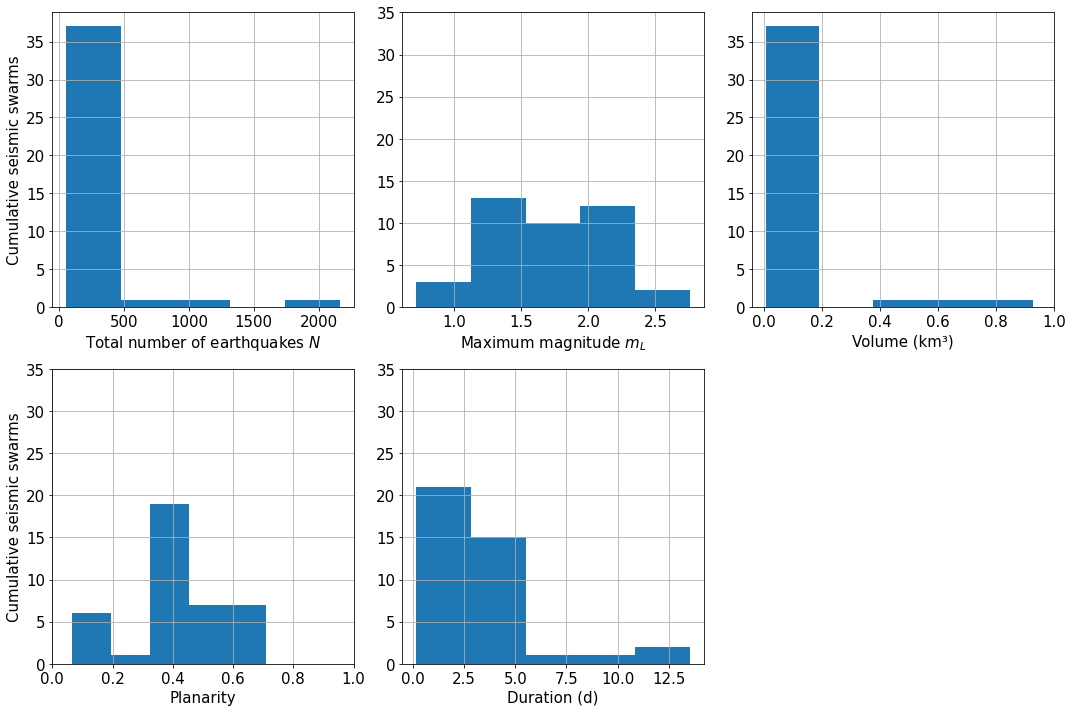

In [8]:
nbins = 5

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(dfA.N, nbins)
plt.yticks(np.arange(0,40,5))
plt.tick_params("both", labelsize=15)
plt.xlabel("Total number of earthquakes $N$", fontsize=15)
plt.ylabel("Cumulative seismic swarms", fontsize=15)
plt.grid()

plt.subplot(2,3,2)
plt.hist(dfA.max_m, nbins, label=['all swarms', 'swarms-like with migration','swarms-like without migration'])
plt.yticks(np.arange(0,40,5))
plt.tick_params("both", labelsize=15)
plt.xlabel("Maximum magnitude $m_L$", fontsize=15)
plt.grid()

plt.subplot(2,3,3)
plt.hist(dfA.V2, nbins)
plt.xticks(np.arange(0,1+0.2,0.2))
plt.yticks(np.arange(0,40,5))
plt.tick_params("both", labelsize=15)
plt.xlabel("Volume (km³)", fontsize=15)
plt.grid()

plt.subplot(2,3,4)
plt.hist(dfA.plana, nbins)
plt.xticks(np.arange(0,1+0.2,0.2))
plt.yticks(np.arange(0,40,5))
plt.tick_params("both", labelsize=15)
plt.xlabel("Planarity", fontsize=15)
plt.ylabel("Cumulative seismic swarms", fontsize=15)
plt.grid()

plt.subplot(2,3,5)
plt.hist(dfA.duration, nbins)
plt.yticks(np.arange(0,40,5))
plt.tick_params("both", labelsize=15)
plt.xlabel("Duration (d)", fontsize=15)
plt.grid()

# plt.subplot(2,3,6)
# plt.hist(dfA.v, nbins)
# plt.xticks(np.arange(0,1+0.2,0.2))
# plt.yticks(np.arange(0,40,5))
# plt.tick_params("both", labelsize=15)
# plt.xlabel("Migration velocity (km/d)", fontsize=15)
# plt.grid()

plt.tight_layout()
plt.savefig("v0_d03_n50_every1_clusters/global_stats.png")
plt.show()

## Load EQ catalog:

In [20]:
path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/catalog_all/"

####Raw data:
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

###Swarms obtained by after ETAS & seismicity rate & checking step:
df_swarms = pd.read_csv('v0_d03_n50_every1_clusters/new_df_final_swarms_of_v0_d03_n50_every1.csv')

##Rename swarms after sorting along t1:
df_swarms = df_swarms.sort_values("t1")
df_swarms.index = np.arange(1, len(df_swarms)+1)

df_swarms###Create a column of swarms number:
df0["swarms_num"] = np.zeros(len(df0)) -1

for i in range(0, len(df_swarms)):
    select_swarms = df0.index[(df0.t >= df_swarms.t1.iloc[i])&(df0.t <= df_swarms.t2.iloc[i])
                       & (df0.x >= df_swarms.x1.iloc[i])&(df0.x <= df_swarms.x2.iloc[i])
                       & (df0.y >= df_swarms.y1.iloc[i])&(df0.y <= df_swarms.y2.iloc[i])
                       & (df0.z >= df_swarms.z1.iloc[i])&(df0.z <= df_swarms.z2.iloc[i])]
    
    df0.swarms_num.iloc[select_swarms] = df_swarms.index[i]   
    
    
df0['swarms_num'] = df0['swarms_num'].astype(int)

list_swarms = np.unique(df0["swarms_num"].values)[1:]
print(list_swarms)

###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

df0

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,t,x,y,z,m,x_km,y_km,swarms_num
0,0.004465,42.99118,12.92042,4.107,0.547416,4780.401106,1050.875824,-1
1,0.024991,42.30519,13.68531,6.154,0.964305,4704.122499,1125.431260,-1
2,0.028414,43.52994,12.65680,14.826,0.025395,4840.308485,1020.365169,-1
3,0.030136,43.16713,12.99694,8.917,-0.127835,4799.965854,1054.068313,-1
4,0.043938,43.31555,12.55297,3.274,-0.889339,4816.469405,1015.584715,-1
...,...,...,...,...,...,...,...,...
894438,365.996726,42.81393,13.10829,7.216,-0.325824,4760.691806,1069.225754,-1
894439,365.997166,42.80558,13.14988,3.126,0.304970,4759.763328,1072.763006,-1
894440,365.997419,43.00835,13.14668,1.336,-0.183670,4782.310323,1068.979802,-1
894441,365.999614,42.66073,13.21744,4.262,-0.273458,4743.656743,1080.795874,-1


In [21]:
###Rescale on Norcia event:
xN_km = df0.x_km - N.x_km
yN_km = df0.y_km - N.y_km

df0["xN_km"] = xN_km
df0["yN_km"] = yN_km

###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

###Define EQ m >= 5: ##associated to gold color
df0_m5 = df0[df0.m >= 5]


## Roland and McGuire, 2009: Skewness, kurtosis, centroid time and magnitude difference

In [27]:
def statistics(list_swarm) :

    all_tmax = []
    all_tcentroid = []
    all_skew = []
    all_kurt = []
    all_dm = []
    
    all_tm = [] ##eifference with all_tmax is all_tm is normalized by mean t


    for num_swarm in list_swarm:

        df_clust = 0

        ##Select data:
        df_clust = df0[df0.swarms_num == num_swarm]
        df_clust.index=np.arange(len(df_clust))

        ##Compute new t: réinitialiser le t0
        df_clust["new_t"] = df_clust.t - df_clust.t.iloc[0] 
        
        ##Sort magnitude:
        df_clust_m = df_clust.sort_values("m", ascending = False) ##du + gd au plus petit
        
        ##Get the time of the largest EQ inside the swarm:
        tmax = df_clust_m.new_t.iloc[0]
        all_tmax.append(tmax)
        tm = df_clust_m.new_t.iloc[0] / df_clust_m.new_t.mean()
        all_tm.append(tm)
        
        #######ROLAND AND MCGUIRE, 2009:
        ##Compute seismic moment m0(i):
        m0_i = 10**(1.5*df_clust.m.values + 9.1)
        m0_i = m0_i / np.sum(m0_i) ##np.sum(m0_i) car normalisé
        m_tot = np.sum(m0_i)
        
        ##Compute mean of new_t:
        tbar = np.sum((df_clust.new_t.values * m0_i)) / m_tot
        tcentroid = tbar
        all_tcentroid.append(tcentroid)
        
        ##Compute sigma:
        sigma = np.sqrt(np.sum(((df_clust.new_t.values - tbar)**2)* m0_i))
        
        ##Compute the skewness:
        skew = np.sum(((df_clust.new_t.values - tbar)**3)* m0_i) / (sigma**3)
        all_skew.append(skew)
        
        ##Compute the kurtosis:
        kurt = np.sum(((df_clust.new_t.values - tbar)**4)* m0_i) / (sigma**4)
        all_kurt.append(kurt)
        
        ##Compute difference in magnitude between the 2 largest EQ within the swarm:
        dm = df_clust_m.m.iloc[0] - df_clust_m.m.iloc[1]
        all_dm.append(dm)
    
    all_tmax = np.array(all_tmax)
    all_tcentroid = np.array(all_tcentroid)
    all_skew = np.array(all_skew)
    all_kurt = np.array(all_kurt)
    all_dm = np.array(all_dm)
    all_tm = np.array(all_tm)
    
    data = {"tmax":all_tmax,
            "tcentroid":all_tcentroid,
            "skew": all_skew,
            "kurt":all_kurt,
            "dm": all_dm,
            "tm": all_tm}
    
    df_final = pd.DataFrame(data)
    
    return df_final

In [28]:
print(list_swarms)
df_swarms_characteritics = statistics(list_swarms)
df_swarms_characteritics

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


/home/xianglo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tmax,tcentroid,skew,kurt,dm,tm
0,0.150070,0.540741,2.018801,5.445099,0.035019,0.092326
1,0.494559,0.810181,1.326221,3.039281,0.306887,0.578784
2,1.736868,1.583995,-1.812921,7.492533,0.035940,1.472386
3,1.500646,0.607803,0.618240,1.487506,0.032683,2.032292
4,0.993043,1.182419,3.383429,13.812702,0.016375,0.609479
5,3.113006,1.875566,-0.240210,1.167638,0.530370,2.777152
6,0.014453,0.086505,0.374864,1.898068,0.102200,0.125712
7,0.055221,0.766012,1.511635,3.902139,0.184399,0.031038
8,4.256369,2.770832,-0.575263,3.270437,0.038510,1.627333
9,0.952194,0.874356,-0.791977,3.436393,0.292003,1.148005


In [33]:
df_final_swarms_ratio = pd.read_csv('/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas_23052024_2/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/df_final_swarms_of_v0_d03_n50_every5_with_ratio.csv')

df_final_swarms_ratio = df_final_swarms_ratio.drop([12]) ##remove AF
df_final_swarms_ratio.index = np.arange(0, len(df_final_swarms_ratio))

df_final_swarms_ratio

,t1,t2,x1,x2,y1,y2,z1,z2,num_EQ,mean,Q2,Q3,min,max
0,13.534078,16.936724,42.763,42.771,13.153,13.163,5.301,6.640,31,20.580854,15.502179,32.519906,1.803081,62.438293
1,21.189318,23.352065,42.512,42.518,13.414,13.421,9.786,10.828,30,56.788512,35.777444,76.682420,9.809884,222.702978
2,31.959698,34.152999,42.905,42.914,13.173,13.183,4.573,5.337,52,37.845192,24.581779,39.380698,10.088345,165.586412
3,33.400373,35.318887,42.766,42.773,13.219,13.227,6.343,7.093,97,355.897770,195.608587,321.802092,3.950348,3046.458492
4,43.213940,47.283527,42.896,42.905,13.219,13.228,2.722,3.792,50,31.333576,22.733218,40.614004,3.741107,213.685360
5,54.623879,57.830113,42.632,42.653,13.287,13.310,6.468,7.906,27,15.437777,13.440235,25.559127,3.834724,29.936402
6,56.921319,57.148958,42.863,42.881,13.066,13.090,1.165,3.237,114,11.053452,10.717313,11.415616,10.030696,12.595732
7,72.571283,76.237535,42.523,42.529,13.451,13.464,9.863,11.278,124,156.307931,5.743113,17.445714,0.590307,4601.226994
8,82.026167,86.479576,42.763,42.770,13.101,13.110,4.584,5.328,162,35.084266,29.719743,39.343488,3.399894,137.921523
9,89.020661,90.444182,42.458,42.473,13.239,13.256,6.073,7.706,175,27.336285,16.177005,43.067678,2.686349,91.203531


In [34]:
df_swarms_characteritics_ = df_swarms_characteritics.copy()
df_swarms_characteritics_ = pd.concat([df_swarms_characteritics_, df_final_swarms_ratio.iloc[:,9:]], axis=1)
df_swarms_characteritics_.index = np.arange(1, len(df_swarms_characteritics_)+1)

df_swarms_characteritics_#.Q3.quantile([0.25,0.5,0.75])

,tmax,tcentroid,skew,kurt,dm,tm,mean,Q2,Q3,min,max
1,0.150070,0.540741,2.018801,5.445099,0.035019,0.092326,20.580854,15.502179,32.519906,1.803081,62.438293
2,0.494559,0.810181,1.326221,3.039281,0.306887,0.578784,56.788512,35.777444,76.682420,9.809884,222.702978
3,1.736868,1.583995,-1.812921,7.492533,0.035940,1.472386,37.845192,24.581779,39.380698,10.088345,165.586412
4,1.500646,0.607803,0.618240,1.487506,0.032683,2.032292,355.897770,195.608587,321.802092,3.950348,3046.458492
5,0.993043,1.182419,3.383429,13.812702,0.016375,0.609479,31.333576,22.733218,40.614004,3.741107,213.685360
6,3.113006,1.875566,-0.240210,1.167638,0.530370,2.777152,15.437777,13.440235,25.559127,3.834724,29.936402
7,0.014453,0.086505,0.374864,1.898068,0.102200,0.125712,11.053452,10.717313,11.415616,10.030696,12.595732
8,0.055221,0.766012,1.511635,3.902139,0.184399,0.031038,156.307931,5.743113,17.445714,0.590307,4601.226994
9,4.256369,2.770832,-0.575263,3.270437,0.038510,1.627333,35.084266,29.719743,39.343488,3.399894,137.921523
10,0.952194,0.874356,-0.791977,3.436393,0.292003,1.148005,27.336285,16.177005,43.067678,2.686349,91.203531


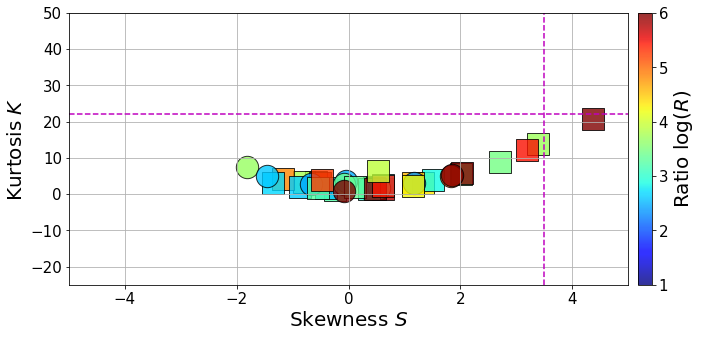

In [43]:
msz=500

###From Mesimeri et al, 2019:
###Parabola of 95% confidence limits:
a = [1.03, 1.14]
b = [0.41, 1.31]
c = [-30.79, 43.60]

x = np.arange(-10, 20, 0.1)

p1 = a[0]*x**2 + b[0]*x + c[0] ##parabole en bas
p2 = a[1]*x**2 + b[1]*x + c[1] ##parabole en haut


select_cmap = "jet"
clim1, clim2 = 1, 6

plt.figure(figsize=(12,5))
for i in range(1,40):
    if dfM[dfM.I.values == i].empty == False:
        I = df_swarms_characteritics_[df_swarms_characteritics_.index == i]
#         print(i, I["skew"].values, I["kurt"].values, np.log(I["Q3"].values))
        plt.scatter(I["skew"].values, I["kurt"].values, s=msz, marker='s', c=np.log(I["Q3"].values), cmap=select_cmap, edgecolors='k', linewidths=1, alpha = 0.8)
        plt.clim([clim1,clim2])
#         plt.annotate(str(int(i)), (I["skew"].values, I["kurt"].values),
#                 color="white", alpha =1, size=10, 
#                 path_effects=[pe.withStroke(linewidth=3, foreground="k")])         
    else:
        I = df_swarms_characteritics_[df_swarms_characteritics_.index == i]
#         print(i, I["skew"].values, I["kurt"].values, np.log(I["Q3"].values))
        plt.scatter(I["skew"].values, I["kurt"].values, s=msz, c=np.log(I["Q3"].values), cmap=select_cmap, edgecolors='k', linewidths=1, alpha = 0.8)
        plt.clim([clim1,clim2])
#         plt.annotate(str(int(i)), (I["skew"], I["kurt"]),
#                 color="white", alpha =1, size=10, 
#                 path_effects=[pe.withStroke(linewidth=3, foreground="k")])
            
# plt.plot(x, p1, ls='--', c='k')
# plt.plot(x, p2, ls='--', c='k')

plt.axvline(x=3.5, ls = '--', c='m')
plt.axhline(y=22, ls = '--', c='m')
    
plt.xlabel("Skewness $S$", fontsize=20)
plt.ylabel("Kurtosis $K$", fontsize=20)
plt.xlim([-5, 5])
plt.ylim([-25, 50])
cb = plt.colorbar(pad=0.015)
cb.set_label(label='Ratio log($R$)', size=20)
cb.ax.tick_params(labelsize=15)
plt.tick_params(axis='both',labelsize=15)
plt.grid()
plt.savefig("v0_d03_n50_every1_clusters/skew_vs_kurt_zoom.png")
plt.show()